In [14]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import defaultdict

In [15]:
def parse_log(log):
    a = [line.strip('\n').split(' ') for line in log]
    d = defaultdict(dict)
    
    for line in a:
        step = int(line[1])
        for k, v in zip(line[2::2], line[3::2]):
            d[step][k] = float(v)
            
    return pd.DataFrame(d.values(), index=d.keys())

def plot(runs, k1, k2, logy=True):
    # Loss Logging
    fig, ax = plt.subplots(ncols=2, figsize=(18,8))

    for run in runs:
        optimizer = run.split('/')[1]
        with open(run) as fh:
            df = parse_log(fh.readlines())
        df.plot(logy=logy, ax=ax[0], y=k1, label=optimizer)
        ax[0].set_title('Training')
        df.plot(logy=logy, ax=ax[1], y=k2, label=optimizer)
        ax[1].set_title('Validation')

In [16]:
runs = glob.glob('out/*/loss.log')
print(f'Found runs {runs}')

Found runs ['out/rmsprop/loss.log', 'out/sgd_with_momentum/loss.log', 'out/sgd/loss.log']


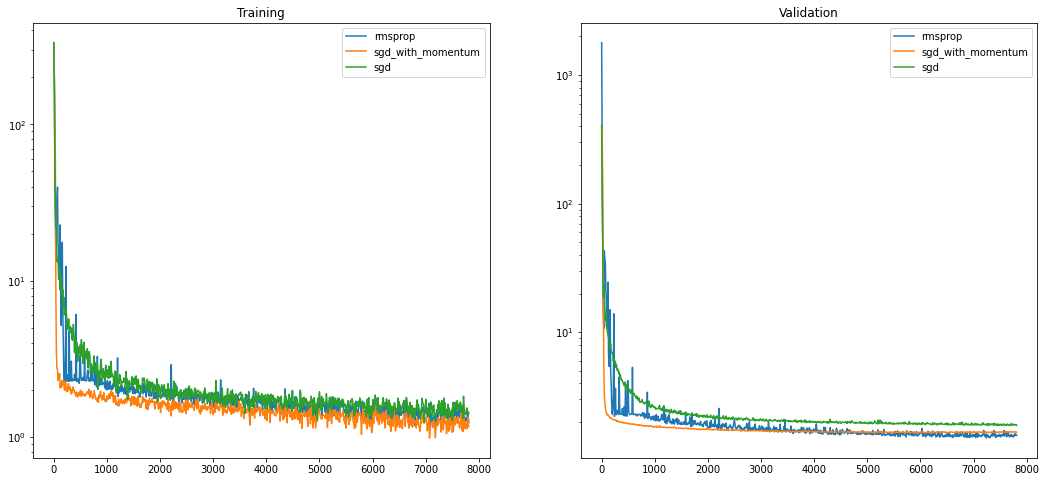

In [17]:
plot(runs, 'train_loss', 'val_loss')

In [18]:
runs = glob.glob('out/*/acc.log')
print(f'Found runs {runs}')

Found runs ['out/rmsprop/acc.log', 'out/sgd_with_momentum/acc.log', 'out/sgd/acc.log']


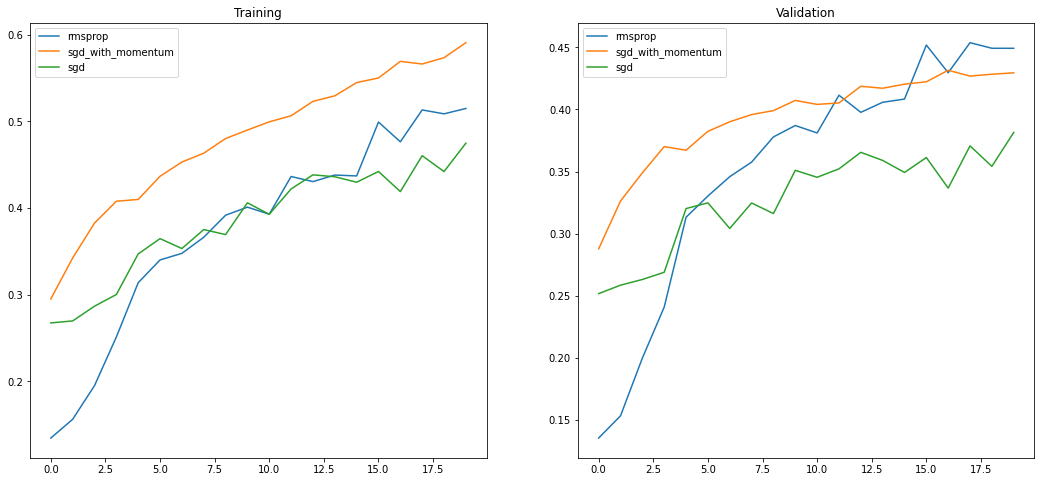

In [19]:
plot(runs, 'train_acc', 'test_acc', logy=False)